In [1]:
'''import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

Define the forward diffusion process
def forward_diffusion(x0, noise, t, T):
    """
    Applies the forward diffusion process.
    
    Args:
    - x0: Original image tensor (batch_size, channels, height, width)
    - noise: Gaussian noise tensor with the same shape as x0
    - t: Current time step in the diffusion process
    - T: Total number of time steps
    
    Returns:
    - xt: Noised image tensor at time step t
    """
    alpha = 1 - (t / T)  # Simple linear schedule
    alpha = alpha.view(-1, 1, 1, 1) 
    alpha = alpha.to(x0.device)  # Move alpha to the same device as x0
    return alpha * x0 + (1 - alpha) * noise

# Simple U-Net-like model for reverse process (denoising)
class SimpleUNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(SimpleUNet, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128)
        )
        
        self.decoder = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, out_channels, kernel_size=3, padding=1),
            nn.Sigmoid()  # Output in range [0, 1] for image generation
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Hyperparameters
T = 1000  # Number of time steps
batch_size = 64
learning_rate = 1e-4
epochs = 50
path = '/kaggle/input/number-nitk-dataset/mnist.npz'  # Ensure you have the correct path

# Load the data from the .npz file
data = np.load(path)

# Extract training and test images and labels
train_images = data['x_train']  # Shape: (num_samples, height, width)
train_labels = data['y_train']   # Shape: (num_samples,)
test_images = data['x_test']     # Shape: (num_samples, height, width)
test_labels = data['y_test']      # Shape: (num_samples,)

# Convert the images to PyTorch tensors
train_images = torch.tensor(train_images, dtype=torch.float32)  # Shape: (num_samples, height, width)
train_labels = torch.tensor(train_labels, dtype=torch.long)      # Shape: (num_samples,)
test_images = torch.tensor(test_images, dtype=torch.float32)    # Shape: (num_samples, height, width)
test_labels = torch.tensor(test_labels, dtype=torch.long)        # Shape: (num_samples,)

# Add a channel dimension (for grayscale images)
train_images = train_images.unsqueeze(1)  # Shape: (num_samples, 1, height, width)
test_images = test_images.unsqueeze(1)     # Shape: (num_samples, 1, height, width)

# Create TensorDatasets
train_dataset = TensorDataset(train_images, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Model, optimizer, loss
model = SimpleUNet(in_channels=1, out_channels=1).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Training loop
for epoch in range(epochs):
    model.train()
    
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        optimizer.zero_grad()
        
        # Apply forward diffusion (add noise)
        noise = torch.randn_like(data)*0.1  # Move noise to the same device
        t = torch.randint(0, T, (data.shape[0],)).to(data.device)  # Random time steps and move to the same device
        xt = forward_diffusion(data, noise, t, T)
        
        # Denoising step: predict original image from noisy image
        reconstructed = model(xt)
        loss = criterion(reconstructed, data)
        
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# Generate new images by denoising random noise
model.eval()
with torch.no_grad():
    noise = torch.randn(batch_size, 1, 28, 28).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))  # Move noise to the same device
    generated_images = model(noise)
generated_images = generated_images.squeeze().cpu().numpy()  # Remove channel dimension and move to CPU
plt.figure(figsize=(12, 6))
for i in range(batch_size):
    plt.subplot(8, 8, i + 1)  # Adjust grid size as needed
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
plt.show()'''

'import torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torchvision import datasets, transforms\nfrom torch.utils.data import DataLoader, TensorDataset\nimport numpy as np\n\nDefine the forward diffusion process\ndef forward_diffusion(x0, noise, t, T):\n    """\n    Applies the forward diffusion process.\n    \n    Args:\n    - x0: Original image tensor (batch_size, channels, height, width)\n    - noise: Gaussian noise tensor with the same shape as x0\n    - t: Current time step in the diffusion process\n    - T: Total number of time steps\n    \n    Returns:\n    - xt: Noised image tensor at time step t\n    """\n    alpha = 1 - (t / T)  # Simple linear schedule\n    alpha = alpha.view(-1, 1, 1, 1) \n    alpha = alpha.to(x0.device)  # Move alpha to the same device as x0\n    return alpha * x0 + (1 - alpha) * noise\n\n# Simple U-Net-like model for reverse process (denoising)\nclass SimpleUNet(nn.Module):\n    def __init__(self, in_channels, out_channels):\n        super

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os
import numpy as np
X_train = '/kaggle/input/underwater-images/Train/Raw'
Y_train = '/kaggle/input/underwater-images/Train/Reference'

In [13]:
import os
# Get the list of all image file names in X_train
images = os.listdir(X_train)

# Get the list of all image file names in Y_train
y_train_files = os.listdir(Y_train)

# Optionally, you can filter for image files only (e.g., .jpg, .png)
images = [f for f in x_train_files if f.endswith(('.jpg', '.png'))]
y_train_files = [f for f in y_train_files if f.endswith(('.jpg', '.png'))]

In [42]:
len(images)


700

In [52]:
# preprocess
image_size = 64

def preprocess(image):
    image = tf.io.read_file('/kaggle/input/underwater-images/Train/Raw'+image)
    image = tf.io.decode_jpeg(image)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image = image / 255.0
    image = tf.reshape(image, shape = (image_size, image_size, 3,))
    return image

In [62]:
batch_size = 12
# Filter out None values (files that couldn't be loaded)
training_dataset = tf.data.Dataset.from_tensor_slices((images))
training_dataset = training_dataset.map(preprocess)
training_dataset = training_dataset.shuffle(1000).batch(batch_size)


In [60]:
len(training_dataset)

700

In [40]:
len(training_dataset)

6

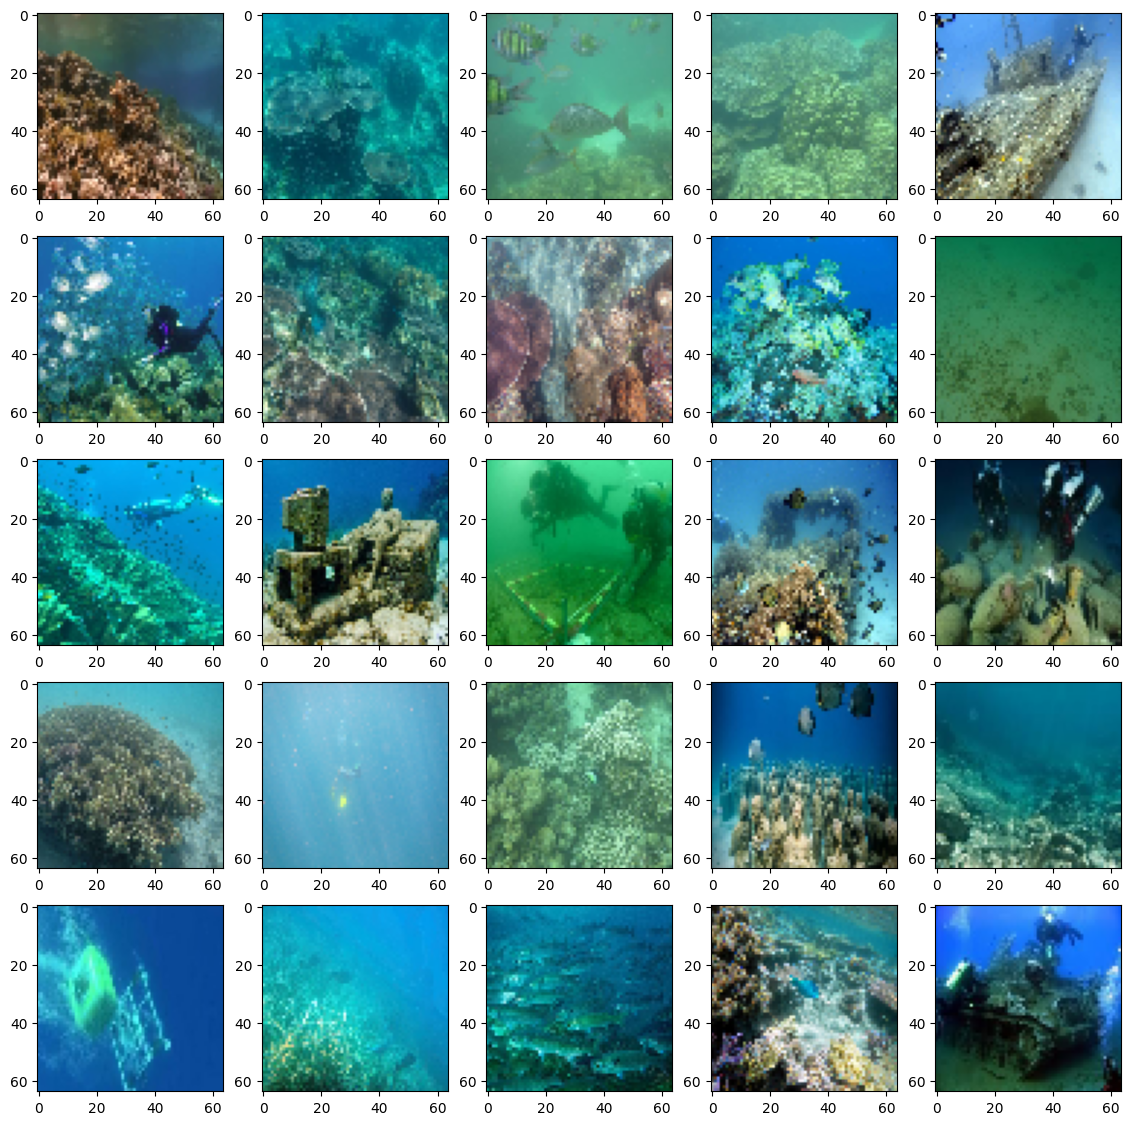

In [63]:
# visualize some of them
fig, axes = plt.subplots(5,5, figsize = (14,14))
sample = training_dataset.unbatch().take(25)
sample = [image for image in sample]

idx = 0
for row in range(5):
    for column in range(5):
        axes[row, column].imshow(sample[idx])
        idx+=1

In [68]:
# build the model
from keras.layers import LeakyReLU


latent_dim = 512
from keras.models import Sequential, Model

from keras.layers import Dense, Conv2D, Conv2DTranspose, Input, Flatten, BatchNormalization, Lambda, Reshape, Activation
from keras.activations import selu
from keras.layers import Multiply, Add
from keras.optimizers import Adam

from keras import backend as K

In [69]:
K.clear_session()

In [74]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense, Multiply, Add, Layer
from tensorflow.keras.models import Model

# Define the latent dimension
latent_dim = 128

# Custom sampling layer for reparameterization trick
class Sampling(Layer):
    def call(self, inputs):
        mu, log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(mu))  # Generate random noise
        sigma = tf.exp(0.5 * log_var)  # Calculate sigma from log variance
        z_eps = Multiply()([sigma, epsilon])  # z = mu + sigma * epsilon
        return Add()([mu, z_eps])

# Encoder input
encoder_input = Input(shape=(64, 64, 3))

# First Conv2D layer with LeakyReLU activation (use negative_slope instead of alpha)
x = Conv2D(32, kernel_size=5, strides=1, padding='same')(encoder_input)
x = LeakyReLU(negative_slope=0.02)(x)
x = BatchNormalization()(x)

# Convolutional layers with increasing filter sizes
filter_size = [64, 128, 256, 512]
for i in filter_size:
    x = Conv2D(i, kernel_size=5, strides=2, padding='same')(x)
    x = LeakyReLU(negative_slope=0.02)(x)
    x = BatchNormalization()(x)

# Flatten the output for fully connected layers
x = Flatten()(x)

# Dense layer with SELU activation
x = Dense(1024, activation=tf.nn.selu)(x)
encoder_output = BatchNormalization()(x)

# Sampling layer (latent space)
mu = Dense(latent_dim)(encoder_output)
log_var = Dense(latent_dim)(encoder_output)

# Use the custom Sampling layer to apply reparameterization trick
z = Sampling()([mu, log_var])

# Define the encoder model
encoder = Model(encoder_input, outputs=[mu, log_var, z], name='encoder')
encoder.summary()




Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 64, 64,    │      2,432 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_20      │ (None, 64, 64,    │          0 │ conv2d_20[0][0]   │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ leaky_re_lu_20[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 32, 32,    │     51,264 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_21      │ (None, 32, 32,    │          0 │ conv2d_21[0][0]   │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ leaky_re_lu_21[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 16, 16,    │    204,928 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_22      │ (None, 16, 16,    │          0 │ conv2d_22[0][0]   │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ leaky_re_lu_22[0… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 8, 8, 256) │    819,456 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_23      │ (None, 8, 8, 256) │          0 │ conv2d_23[0][0]   │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 256) │      1,024 │ leaky_re_lu_23[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 4, 4, 512) │  3,277,312 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_24      │ (None, 4, 4, 512) │          0 │ conv2d_24[0][0]   │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 512) │      2,048 │ leaky_re_lu_24[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 8192)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1024)      │  8,389,632 │ flatten_4[0][0] 

 Total params: 13,015,488 (49.65 MB)

 Trainable params: 13,011,456 (49.63 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [75]:

decoder = Sequential()
decoder.add(Dense(1024, activation = selu, input_shape = (latent_dim, )))
decoder.add(BatchNormalization())

decoder.add(Dense(8192, activation = selu))
decoder.add(Reshape((4,4,512)))

decoder.add(Conv2DTranspose(256, (5,5), activation = LeakyReLU(0.02), strides = 2, padding = 'same'))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(128, (5,5), activation = LeakyReLU(0.02), strides = 2, padding = 'same'))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(64, (5,5), activation = LeakyReLU(0.02), strides = 2, padding = 'same'))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(32, (5,5), activation = LeakyReLU(0.02), strides = 2, padding = 'same'))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(3, (5,5), activation = "sigmoid", strides = 1, padding = 'same'))
decoder.add(BatchNormalization())

decoder.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8192)           │     8,396,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 256)      │     3,277,056 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       819,328 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 64)     │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 32)     │        51,232 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 3)      │         2,403 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 64, 64, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,889,807 (49.17 MB)

 Trainable params: 12,886,793 (49.16 MB)

 Non-trainable params: 3,014 (11.77 KB)

In [76]:
# build the decoder

decoder = Sequential()
decoder.add(Dense(1024, activation = selu, input_shape = (latent_dim, )))
decoder.add(BatchNormalization())

decoder.add(Dense(8192, activation = selu))
decoder.add(Reshape((4,4,512)))

decoder.add(Conv2DTranspose(256, (5,5), activation = LeakyReLU(0.02), strides = 2, padding = 'same'))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(128, (5,5), activation = LeakyReLU(0.02), strides = 2, padding = 'same'))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(64, (5,5), activation = LeakyReLU(0.02), strides = 2, padding = 'same'))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(32, (5,5), activation = LeakyReLU(0.02), strides = 2, padding = 'same'))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(3, (5,5), activation = "sigmoid", strides = 1, padding = 'same'))
decoder.add(BatchNormalization())

decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8192)           │     8,396,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 8, 8, 256)      │     3,277,056 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 16, 16, 128)    │       819,328 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 32, 32, 64)     │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 64, 64, 32)     │        51,232 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 64, 64, 3)      │         2,403 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 64, 64, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,889,807 (49.17 MB)

 Trainable params: 12,886,793 (49.16 MB)

 Non-trainable params: 3,014 (11.77 KB)

In [97]:
from tensorflow.keras.layers import Layer

class KLLossLayer(Layer):
    def call(self, inputs):
        mu, log_var = inputs
        kl_loss_value = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mu) - tf.exp(log_var))
        self.add_loss(kl_loss_value)
        return inputs  # Returning inputs so you can pass them through the rest of your model


In [102]:
# Add the KL Loss layer
kl_loss_layer = KLLossLayer()([mu, log_var])

# Build the model as usual
model = Model(encoder_input, reconstructed, name="vae")


In [105]:
# Build the VAE model
reconstructed = decoder(z)
#model = Model(encoder_input, reconstructed, name="vae")

# Add losses to the model
#loss_reconstruction = reconstruction_loss(encoder_input, reconstructed)
#loss_kl = kl_loss(mu, log_var)
#model.add_loss(loss_reconstruction)
#model.add_loss(kl_loss_layer)

# Summarize the model
model.summary()

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ [(None, 128), (None,   │    13,015,488 │
│                                 │ 128), (None, 128)]     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 64, 64, 3)      │    12,889,807 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,905,295 (98.82 MB)

 Trainable params: 25,898,249 (98.79 MB)

 Non-trainable params: 7,046 (27.52 KB)

In [106]:
# make a function to save images while learning
def save_images(model, epoch, step, input_):
    prediction = model.predict(input_)
    fig, axes = plt.subplots(5,5, figsize = (14,14))
    idx = 0
    for row in range(5):
        for column in range(5):
            image = prediction[idx] * 255
            image = image.astype("int32")
            axes[row, column].imshow(image)
            axes[row, column].axis("off")
            idx+=1
    output_path = "output/"
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    plt.savefig(output_path + "Epoch_{:04d}_step_{:04d}.jpg".format(epoch, step))
    plt.close()

In [128]:
# train vae

from keras.optimizers import Adam

random_vector = tf.random.normal(shape = (25, latent_dim,))
save_images(decoder, 0, 0, random_vector)

mse_losses = []
kl_losses = []

optimizer = Adam(0.0001, 0.5)
epochs = 10

for epoch in range(1, epochs + 1):
    print("Epoch: ", epoch)
    for step, training_batch in enumerate(training_dataset):
        with tf.GradientTape() as tape:
            reconstructed = model(training_batch)
            y_true = tf.reshape(training_batch, shape = [-1])
            y_pred = tf.reshape(reconstructed, shape = [-1])
            
            mse_loss = reconstruction_loss(y_true, y_pred)
            mse_losses.append(mse_loss.numpy())
            
            kl = sum(model.losses)  # This could be an integer if no losses are found
            if isinstance(kl, tf.Tensor):  # Check if `kl` is a Tensor
                kl_losses.append(kl.numpy())
            else:
                kl_losses.append(kl)  # Just append the integer if no tensor is found

            
            train_loss = 0.01 * kl + mse_loss
            
            grads = tape.gradient(train_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            
            if step % 10 == 0:
                save_images(decoder, epoch, step, random_vector)
            # Ensure mse_loss and kl are TensorFlow tensors before calling .numpy()
            mse_loss_val = mse_loss.numpy() if isinstance(mse_loss, tf.Tensor) else mse_loss
            kl_loss_val = kl.numpy() if isinstance(kl, tf.Tensor) else kl
            
            #print("Epoch: %s - Step: %s - MSE loss: %s - KL loss: %s" % (epoch, step, mse_loss.numpy(), kl.numpy()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch:  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch:  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch:  5


In [ ]:
Model

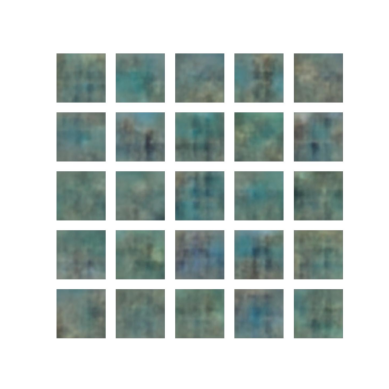

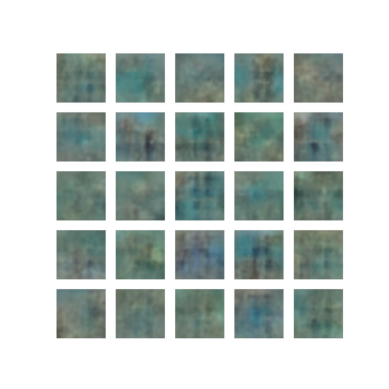

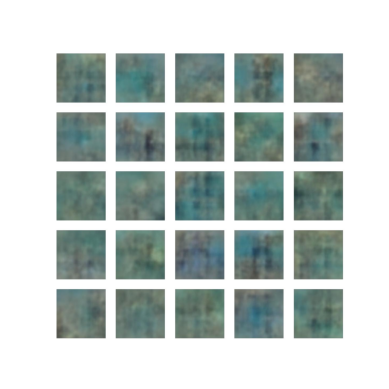

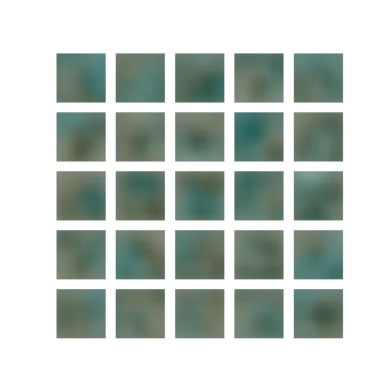

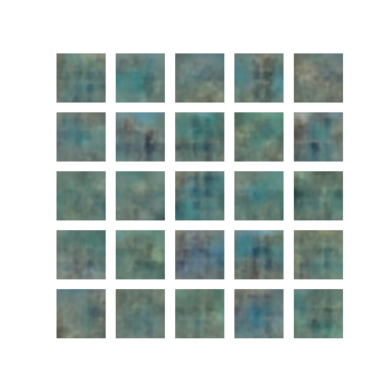

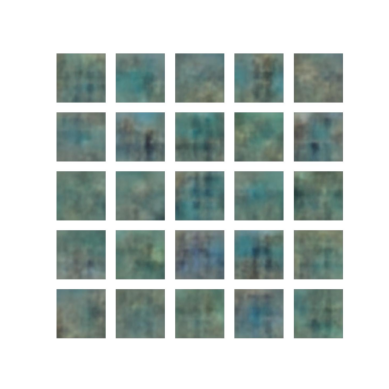

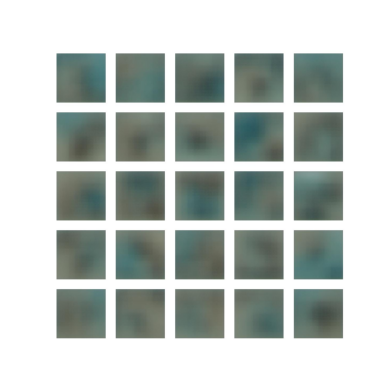

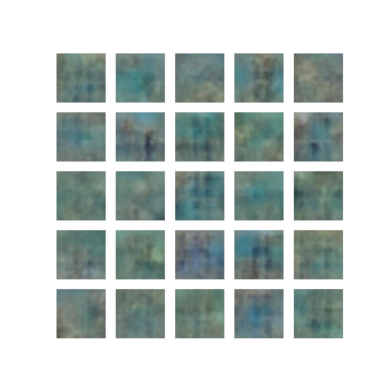

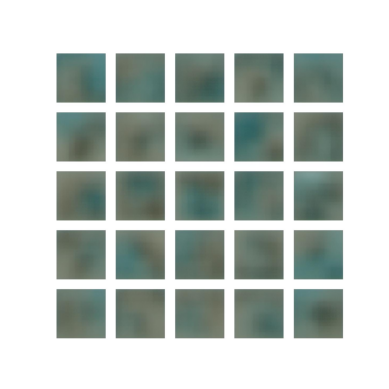

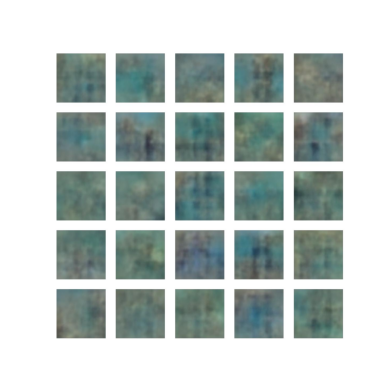

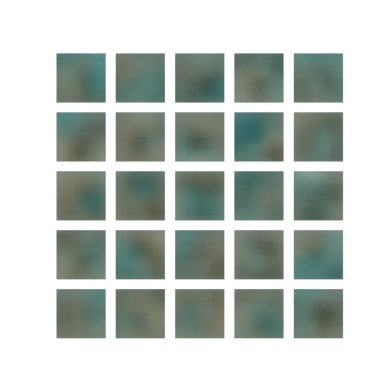

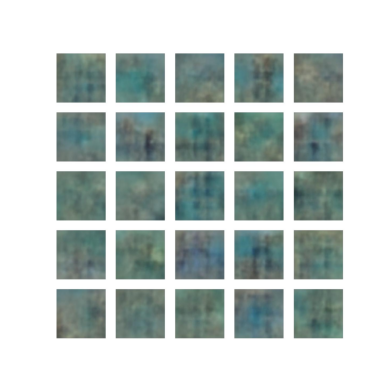

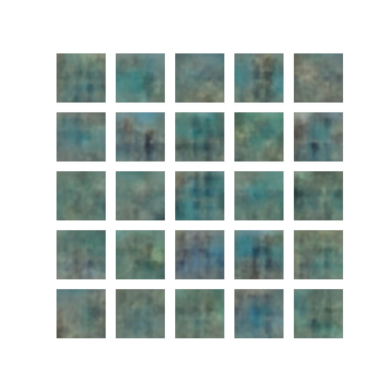

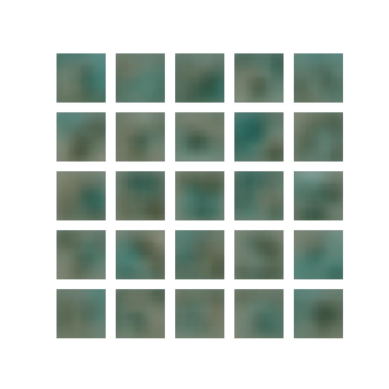

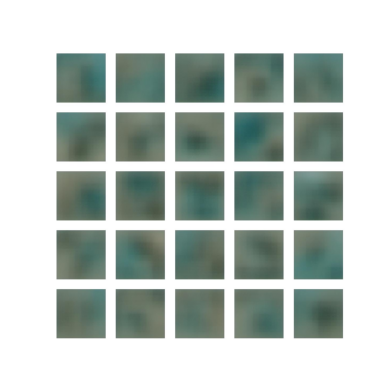

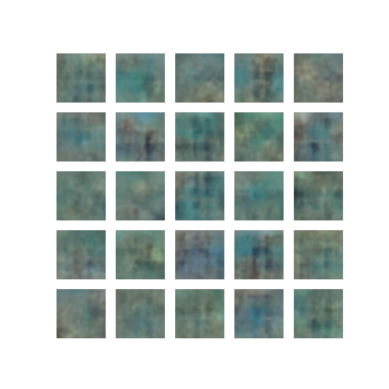

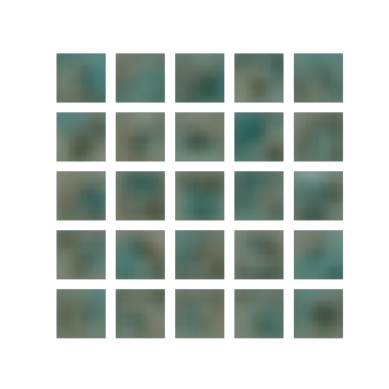

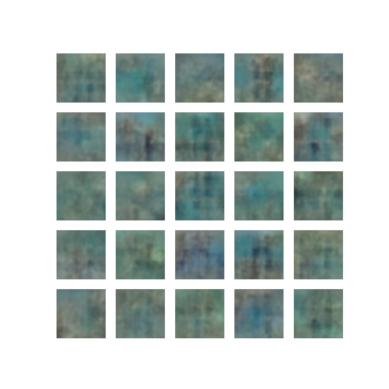

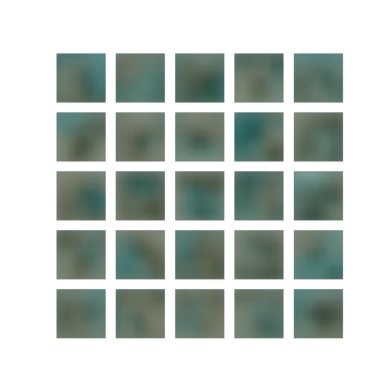

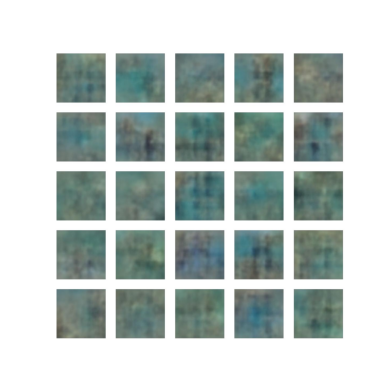

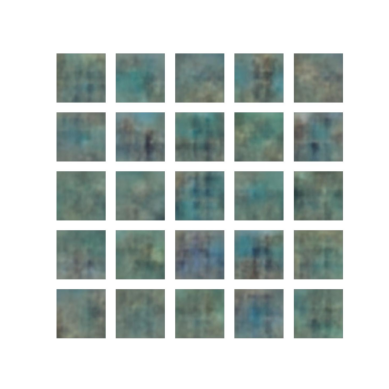

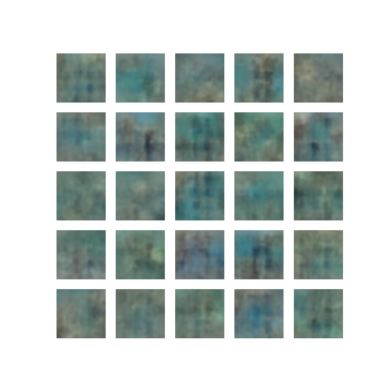

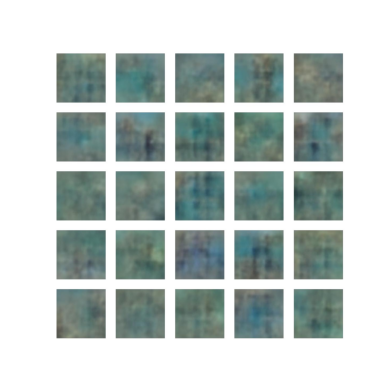

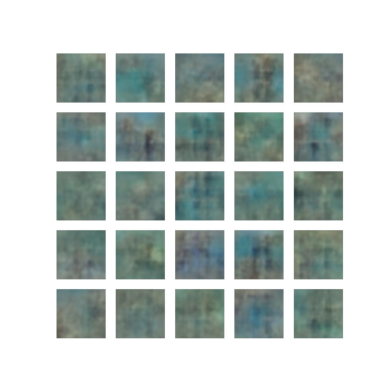

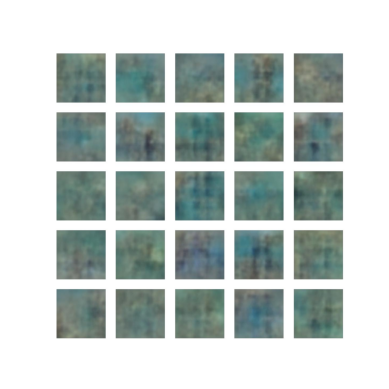

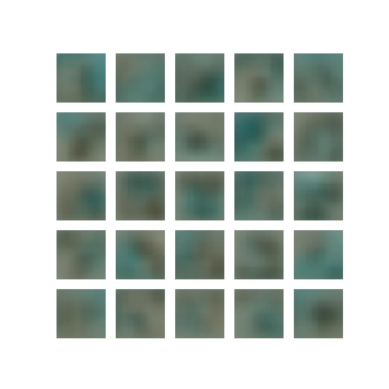

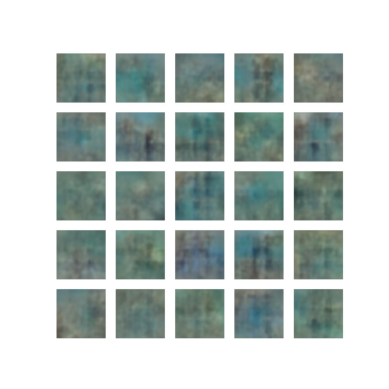

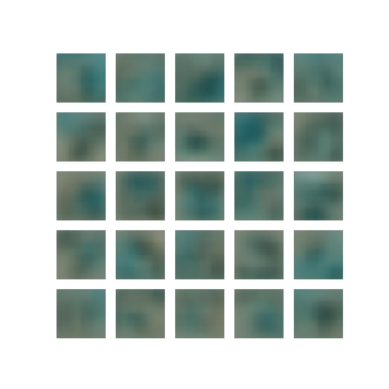

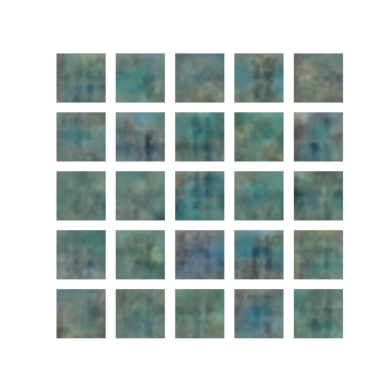

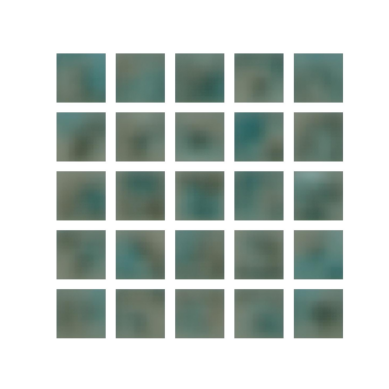

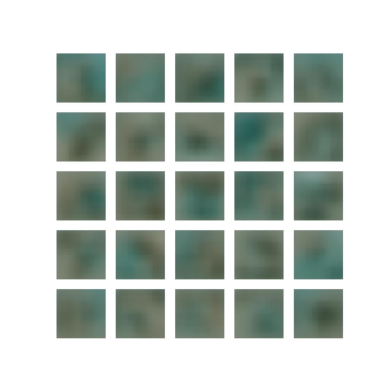

In [119]:
import matplotlib.pyplot as plt

for file in files:
    image = cv2.imread(output_dir + file)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis labels
    plt.show()

    # You can add a condition to break the loop if needed


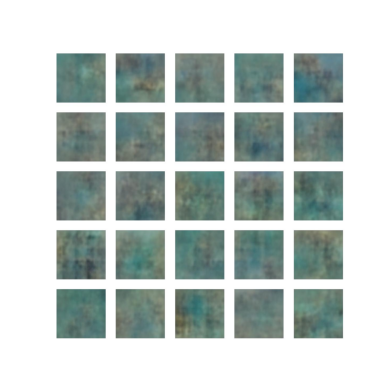

In [129]:
import cv2
import os
import matplotlib.pyplot as plt

# Directory where images are saved
output_dir = '/kaggle/working/output'

# Specify the epoch number you want to load the image from
  # for example, after 3 epochs

# Assuming the file naming pattern is like 'Epoch_XXXX_step_XXXX.jpg'
# Find the file corresponding to the 3rd epoch
# Example filename pattern: 'Epoch_0003_step_0040.jpg'
desired_file = f"Epoch_{epoch:04d}_step_0040.jpg"  # modify the step number if needed
image_path = os.path.join(output_dir, desired_file)

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # Convert BGR (used by OpenCV) to RGB for proper display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()
else:
    print(f"Failed to load {image_path}. Check if the file exists.")
